In [49]:
#Introduce the required python library
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import sklearn.metrics

import matplotlib.gridspec as gridspec
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,auc,precision_recall_curve,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report

In [50]:
#Read the file, check the data size, and observe the data
data = pd.read_csv("creditcard.csv")
print("······The size of the data set is······")
print(data.shape)
print("\n")
print("······The header of the data set is······")
print(data.head())
print("\n")

······The size of the data set is······
(284807, 31)


······The header of the data set is······
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.8

In [51]:
#Check the data info, you can see the data type of each variable
print("······The data type of this data is·····")
print(data.info())
print("\n")

······The data type of this data is·····
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20    

In [52]:
#View the distribution of variables in the data
print("The distribution of the variables in this data set is")
print(data.describe())
print("\n")

The distribution of the variables in this data set is
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.13

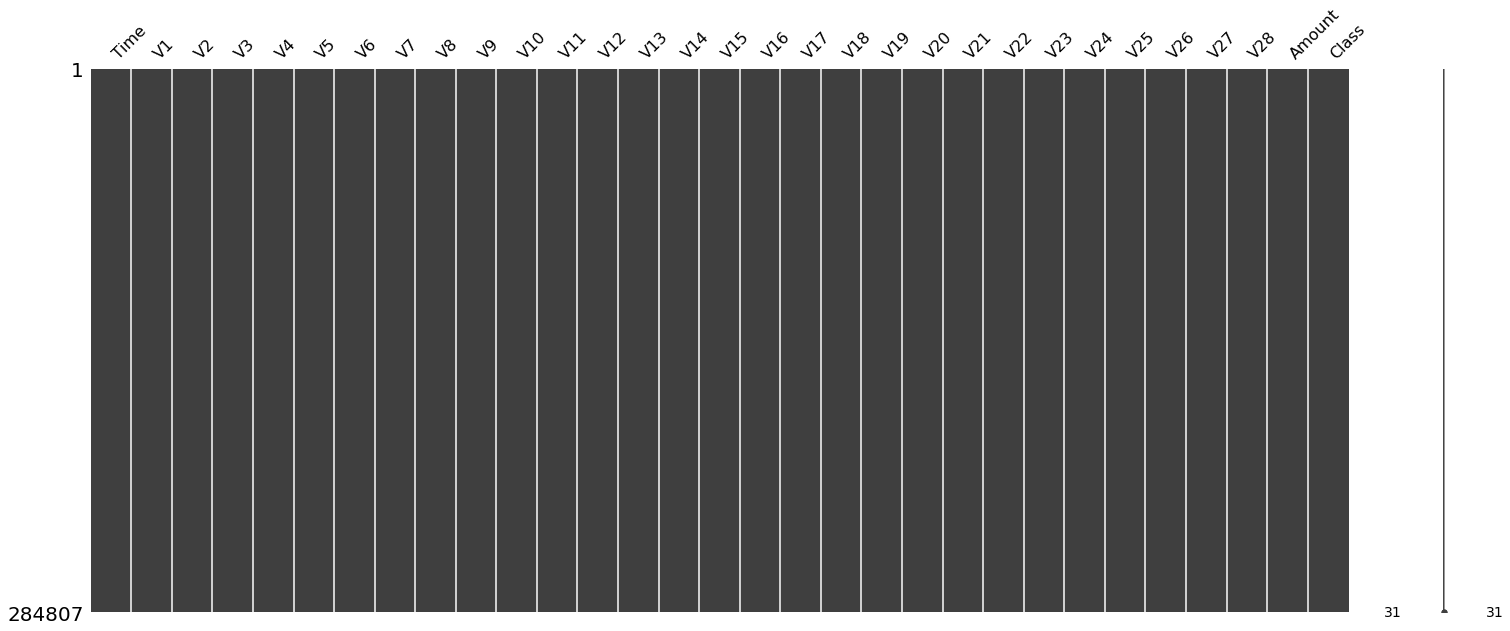

In [53]:
#You can call the missingno library to quickly visualize missing values.
missingno.matrix(data)# View missing values
plt.show()

In [54]:
#Looking at the category labels, we can see that the data set is very unbalanced, and the fraud samples account for only a small proportion of the overall sample.
print("······View category labels······")
print(data.Class.value_counts())
print("\n")

······View category labels······
0    284315
1       492
Name: Class, dtype: int64




In [55]:
#Convert the Time field to hours, and then use "hours" for analysis.
data['Hour'] =data["Time"].apply(lambda x : divmod(x, 3600)[0]) #Unit conversion

In [56]:
#Distinguish between positive and negative samples
Xfraud = data[data["Class"] == 1]
XnonFraud = data[data["Class"] == 0]

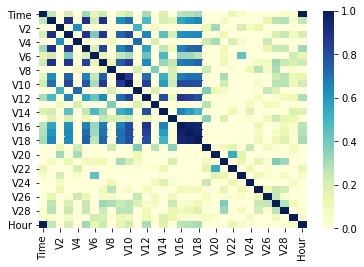

In [57]:
sns.heatmap(Xfraud.drop('Class',axis=1).corr(),vmax=1,vmin=0,cmap='YlGnBu')
#Visualize the correlation of fraud samples, and the results show that some variables of fraud samples are strongly correlated.
plt.show()

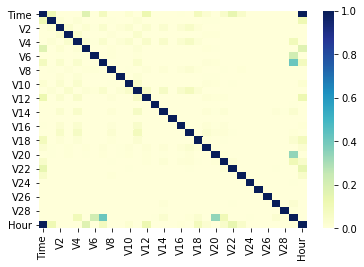

In [58]:
sns.heatmap(XnonFraud.drop('Class',axis=1).corr(),vmax=1,vmin=0,cmap='YlGnBu')
plt.show()

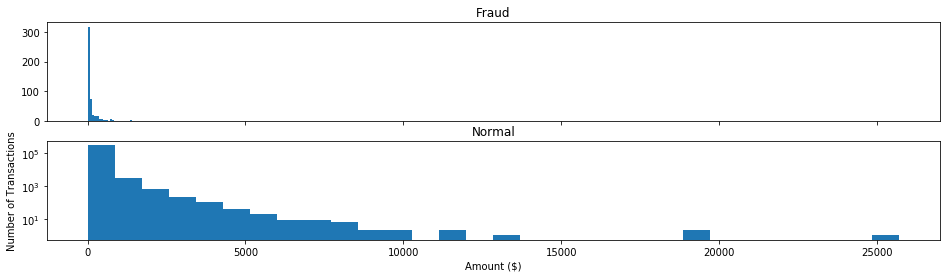

In [59]:
#Analyze the transaction amount of positive and negative samples
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data[data["Class"]== 1]["Amount"], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data[data["Class"] == 0]["Amount"], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

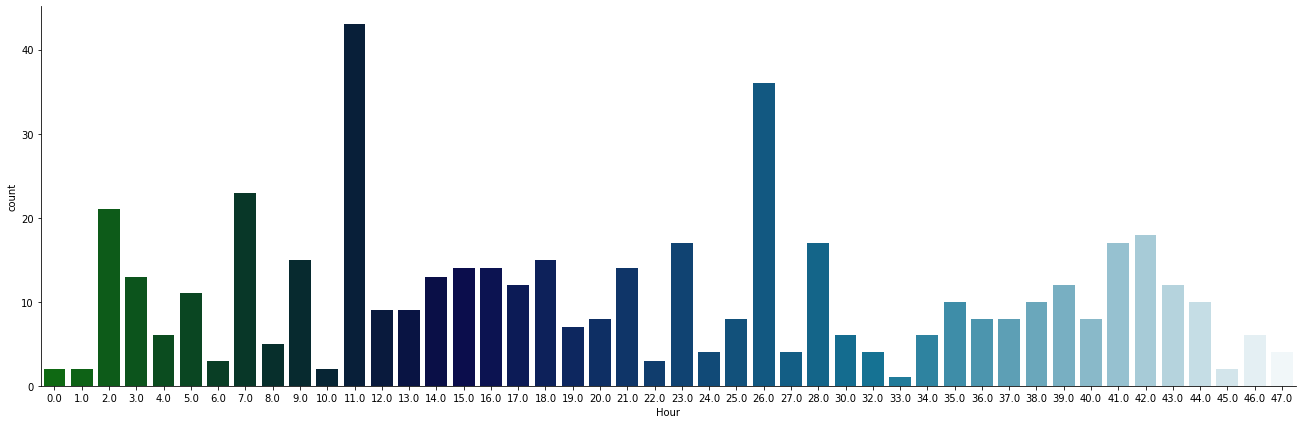

In [60]:
#Time distribution of fraudulent transactions
sns.factorplot(x="Hour", data=data[data["Class"]== 1], kind="count",  palette="ocean", size=6, aspect=3)
plt.show()

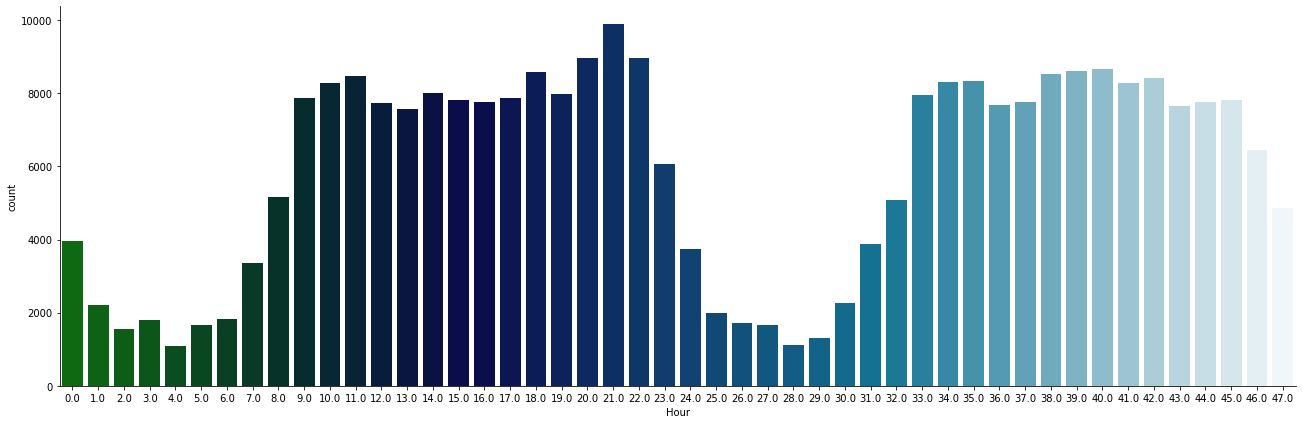

In [61]:
#Normal trading time distribution
sns.factorplot(x="Hour", data=data[data["Class"]== 0], kind="count",  palette="ocean", size=6, aspect=3)
plt.show()

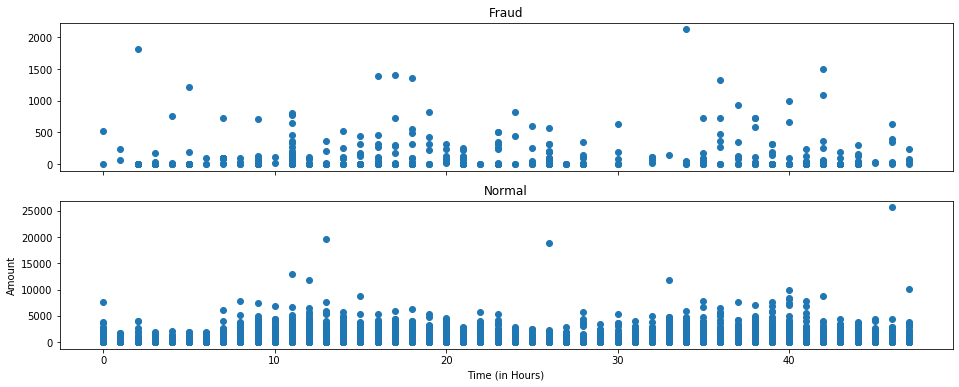

In [62]:
#The relationship between fraudulent transactions, transaction amount and transaction time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(data[data["Class"] == 1]["Hour"], data[data["Class"] == 1]["Amount"])
ax1.set_title('Fraud')

ax2.scatter(data[data["Class"] == 0]["Hour"], data[data["Class"] == 0]["Amount"])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

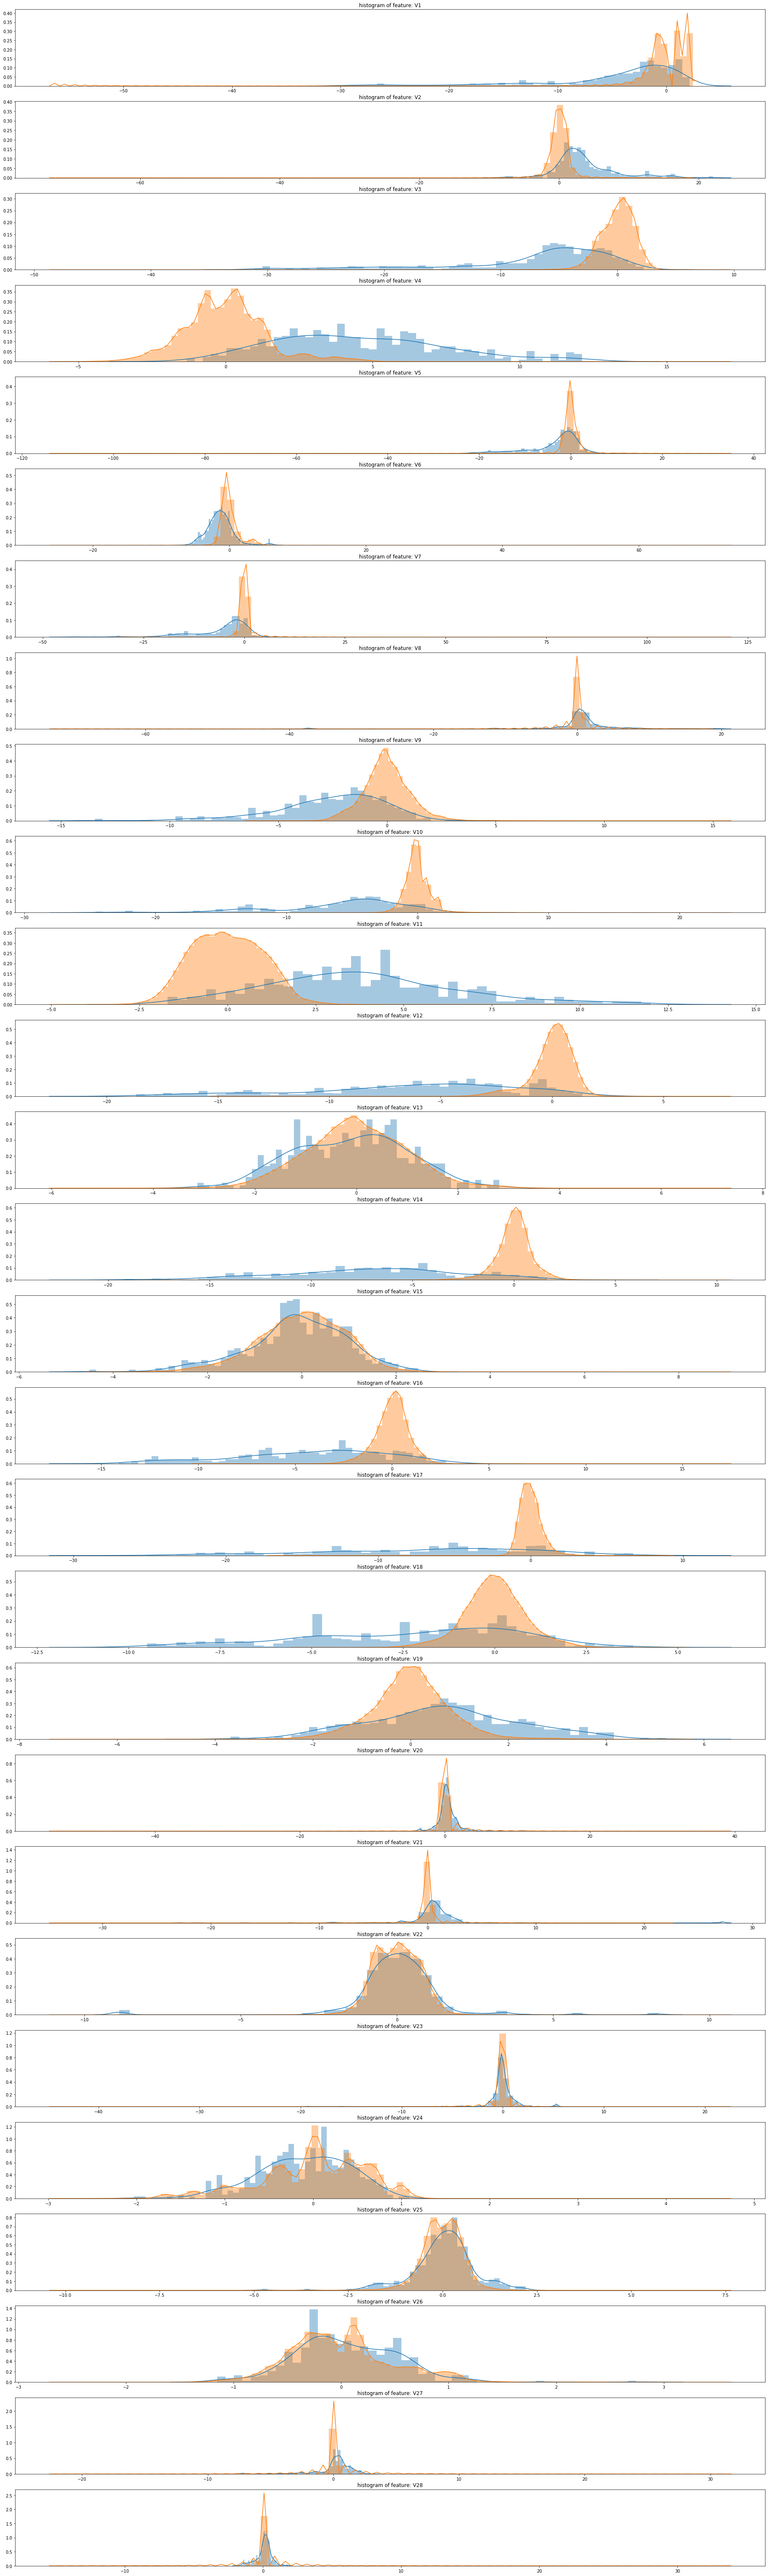

In [63]:
v_feat = data.columns[1:29]
plt.figure(figsize=(16*2,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[data["Class"] == 1][cn], bins=50,label='Class_1')
    sns.distplot(data[data["Class"] == 0][cn], bins=100,label='Class_0')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
 #这里使用了sns.distplot

plt.show()

In [64]:
#Delete variables that do not distinguish between positive and negative samples. Of course, if the designed model is complex and the sample size is large, these variables can be retained to avoid information loss.
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data.drop(droplist, axis = 1)
data_new.shape # View data dimensions

(284807, 19)

In [65]:
# Feature scaling for Amount and Hour
col = ['Amount','Hour']
sc =StandardScaler() # Initialize the scaler
data_new[col] =sc.fit_transform(data_new[col])#Standardize data
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.244964,0,-1.960264
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.342475,0,-1.960264
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,1.160686,0,-1.960264
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.140534,0,-1.960264
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.073403,0,-1.960264


In [66]:
#Divide data and labels
X_data = data_new.drop('Class',axis=1)
y = data_new.Class
#Get index of positive and negative samples
index1 = data_new[data_new.Class==1].index
index0 = data_new[data_new.Class==0].index

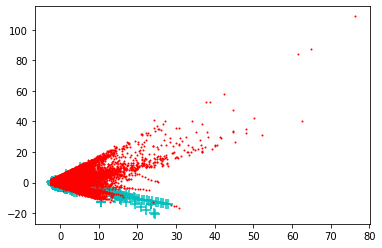

In [67]:
#Perform principal component analysis on the data and reduce the dimension to 2 dimensions.
data_pca = PCA(n_components=2).fit_transform(X_data)

f = plt.figure(1)#Observe the data distribution
plt.scatter(data_pca[index1,0],data_pca[index1,1],marker = '+', color = 'c',s=100)
plt.scatter(data_pca[index0,0],data_pca[index0,1],marker = 'o', color = 'r',s=1)
plt.show()

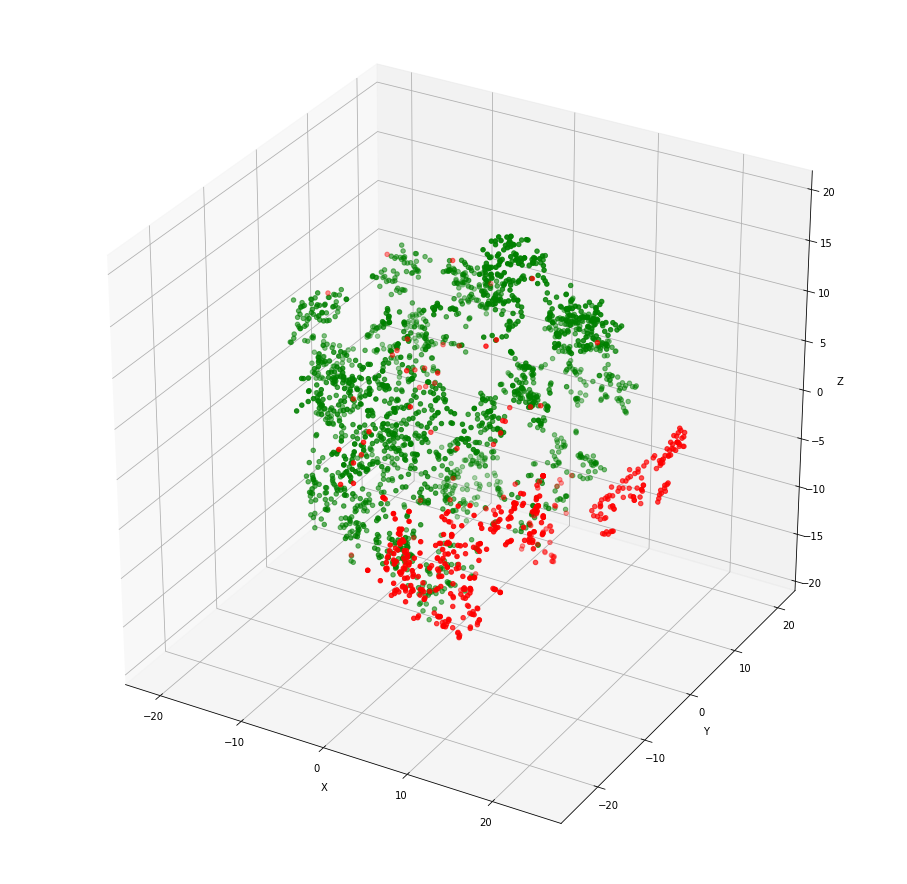

In [68]:
#Take samples for visualization
non_fraud = data_new[data_new['Class'] == 0].sample(2000)
fraud = data_new[data_new['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values

index1 = df[df.Class==1].index
index0 = df[df.Class==0].index

from mpl_toolkits.mplot3d import Axes3D

data_tsne = TSNE(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne[index1,0],data_tsne[index1,1],data_tsne[index1,2], c='r')  # Plot data points
ax.scatter(data_tsne[index0,0],data_tsne[index0,1],data_tsne[index0,2], c='g')

ax.set_zlabel('Z')  # Axis
ax.set_ylabel('Y')
ax.set_xlabel('X')

plt.show()

Train on 227452 samples, validate on 56863 samples
Epoch 1/10
227452/227452 [==============================] - 5s 20us/sample - loss: 0.7496 - val_loss: 0.7361
Epoch 2/10
227452/227452 [==============================] - 4s 18us/sample - loss: 0.7315 - val_loss: 0.7277
Epoch 3/10
227452/227452 [==============================] - 4s 18us/sample - loss: 0.7303 - val_loss: 0.7327
Epoch 4/10
227452/227452 [==============================] - 4s 18us/sample - loss: 0.7308 - val_loss: 0.7354
Epoch 5/10
227452/227452 [==============================] - 4s 19us/sample - loss: 0.7282 - val_loss: 0.7211
Epoch 6/10
227452/227452 [==============================] - 4s 18us/sample - loss: 0.7302 - val_loss: 0.7220
Epoch 7/10
227452/227452 [==============================] - 4s 19us/sample - loss: 0.7281 - val_loss: 0.7257
Epoch 8/10
227452/227452 [==============================] - 4s 18us/sample - loss: 0.7265 - val_loss: 0.7242
Epoch 9/10
227452/227452 [==============================] - 4s 18us/sample - 

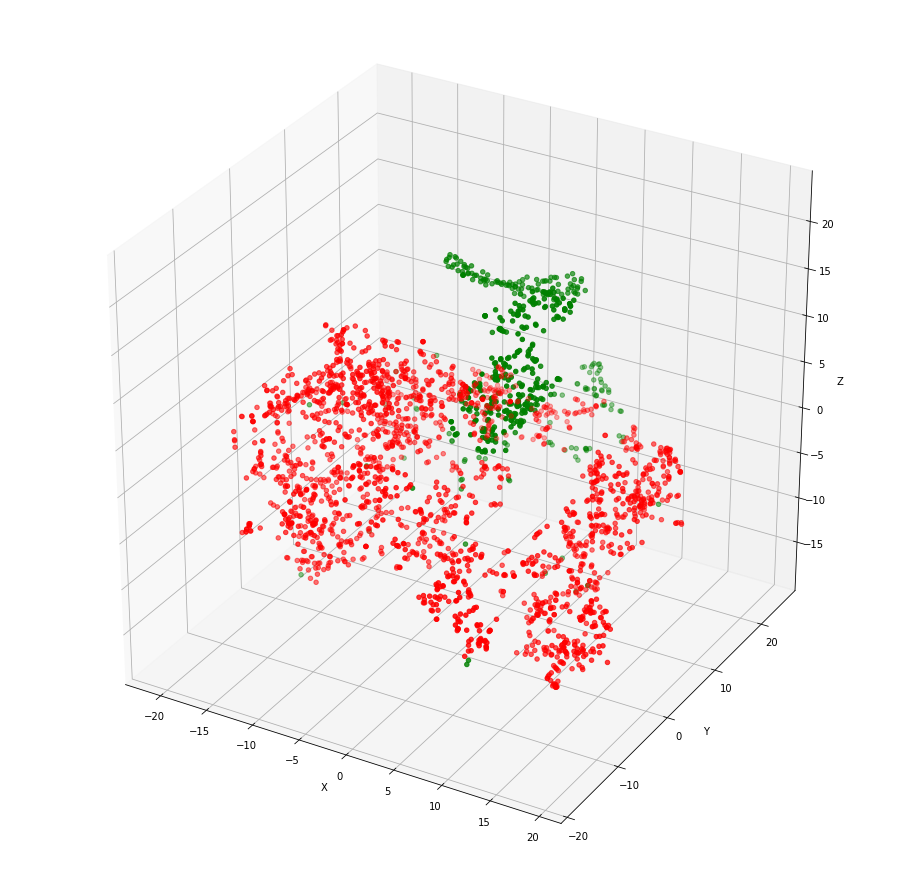

In [69]:
#Building AutoEncoder
import tensorflow as tf
from tensorflow.keras import layers,Input,regularizers,Model,Sequential

x_norm = data_new[data_new['Class'] == 0].drop('Class',axis=1)
x_fraud = data_new[data_new['Class'] == 1].drop('Class',axis=1)

input_layer = Input(shape=(x_norm.shape[1],))
## encoding part
encoding_dim = 128
encoded = layers.Dense(encoding_dim,activation='tanh',activity_regularizer=regularizers.l1(1e-4))(input_layer)
encoded = layers.Dense(encoding_dim/2, activation='relu')(encoded)

## decoding part
decoded = layers.Dense(encoding_dim/2, activation='tanh')(encoded)
decoded = layers.Dense(encoding_dim, activation='tanh')(decoded)

output_layer = layers.Dense(x_norm.shape[1],activation='relu')(decoded)

autoencoder = Model(input_layer,output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(x_norm, x_norm, 
                batch_size = 64, epochs = 10, 
                shuffle = True, validation_split = 0.20)


#Feature expression
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

norm_hid_rep = hidden_representation.predict(x_norm[:2000])
fraud_hid_rep = hidden_representation.predict(x_fraud)
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)


rep_x.shape

#Visualize the features expressed by AutoEncoder
data_tsne = TSNE(n_components=3).fit_transform(rep_x)

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne[:norm_hid_rep.shape[0],0],data_tsne[:norm_hid_rep.shape[0],1],data_tsne[:norm_hid_rep.shape[0],2], c='r')  #Plot data points
ax.scatter(data_tsne[norm_hid_rep.shape[0]:,0],data_tsne[norm_hid_rep.shape[0]:,1],data_tsne[norm_hid_rep.shape[0]:,2], c='g')

ax.set_zlabel('Z')  #Axis
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [70]:
#All samples for feature expression

from sklearn.model_selection import train_test_split
norm_hid_rep = hidden_representation.predict(x_norm)
fraud_hid_rep = hidden_representation.predict(x_fraud)
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

# Build parameter combinations
print("calculate X_train")

#Through smote over sampling, 50% positive and 50% negative samples are obtained
X_sample,y_sample = SMOTE(random_state=2019).fit_sample(rep_x, rep_y)

X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size = 0.3, random_state = 2019)
param_grid = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}
print("Determine the model")
grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) # Determine the model LogisticRegression, and parameter combination param_grid, cv specify 10
print("Learning algorithm using training set")
grid_search.fit(X_train, y_train) # Learning algorithm using training set
print("best model")
best_model = grid_search.best_estimator_
print('accuracy_score:',accuracy_score(y_test,best_model.predict(X_test)))
print('roc_auc_score:',roc_auc_score(y_test,best_model.predict(X_test)))
print('recall_score:',recall_score(y_test,best_model.predict(X_test)))
print('precision_score:',precision_score(y_test,best_model.predict(X_test)))

confusion_matrix(y_test, best_model.predict(X_test))  # Generate confusion matrix
#It can be seen that the recall score is low, a large number of 1s are misjudged as 0, and it is predicted that the offset to the category with a large proportion of 0
print(classification_report(y_test, best_model.predict(X_test)))

calculate X_train
Determine the model
Learning algorithm using training set
best model
accuracy_score: 0.9490002286196648
roc_auc_score: 0.9490713231057667
recall_score: 0.927219183845183
precision_score: 0.9697858609562922
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     85017
         1.0       0.97      0.93      0.95     85572

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



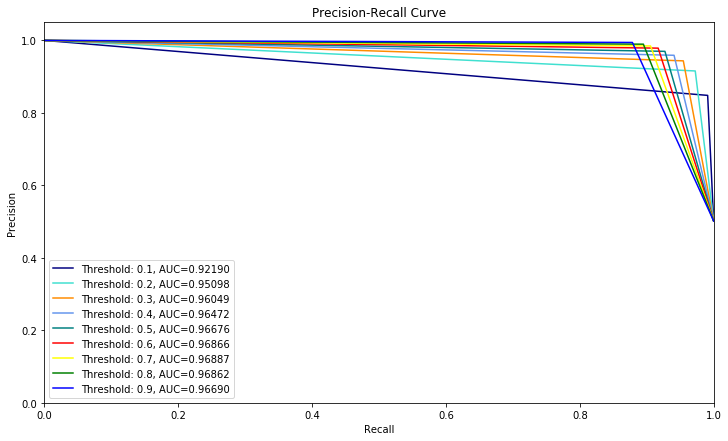

In [71]:
from itertools import cycle
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

y_pred_proba = best_model.predict_proba(X_test)  #predict_prob Get a probability value

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  #Set different thresholds

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i #Whether the predicted probability value is greater than the threshold

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
plt.show()